In [153]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
import numpy as np
import pandas as pd
from collections import Counter 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

stop = nltk.corpus.stopwords.words('english')
stop2 = "It","wine","The","This", "A","It's"

In [154]:
reviews = pd.read_csv('data/winereviewscsv.csv', index_col=0)
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [155]:
reviews = reviews.drop_duplicates()
print("Panaikiname besikartojančius duomenis. Liko", len(reviews),"eilučių")

Panaikiname besikartojančius duomenis. Liko 119988 eilučių


# Patikrinkime koreliaciją

Koreliacija tarp 'points' ir 'price'

In [61]:
reviews['points'].corr(reviews['price'])

0.41653398334645436

In [62]:
reviews['points'].corr(reviews['description'].apply(len))

0.5622352577813113

In [63]:
reviews['description'].apply(len).corr(reviews['price'])

0.2520927502582722

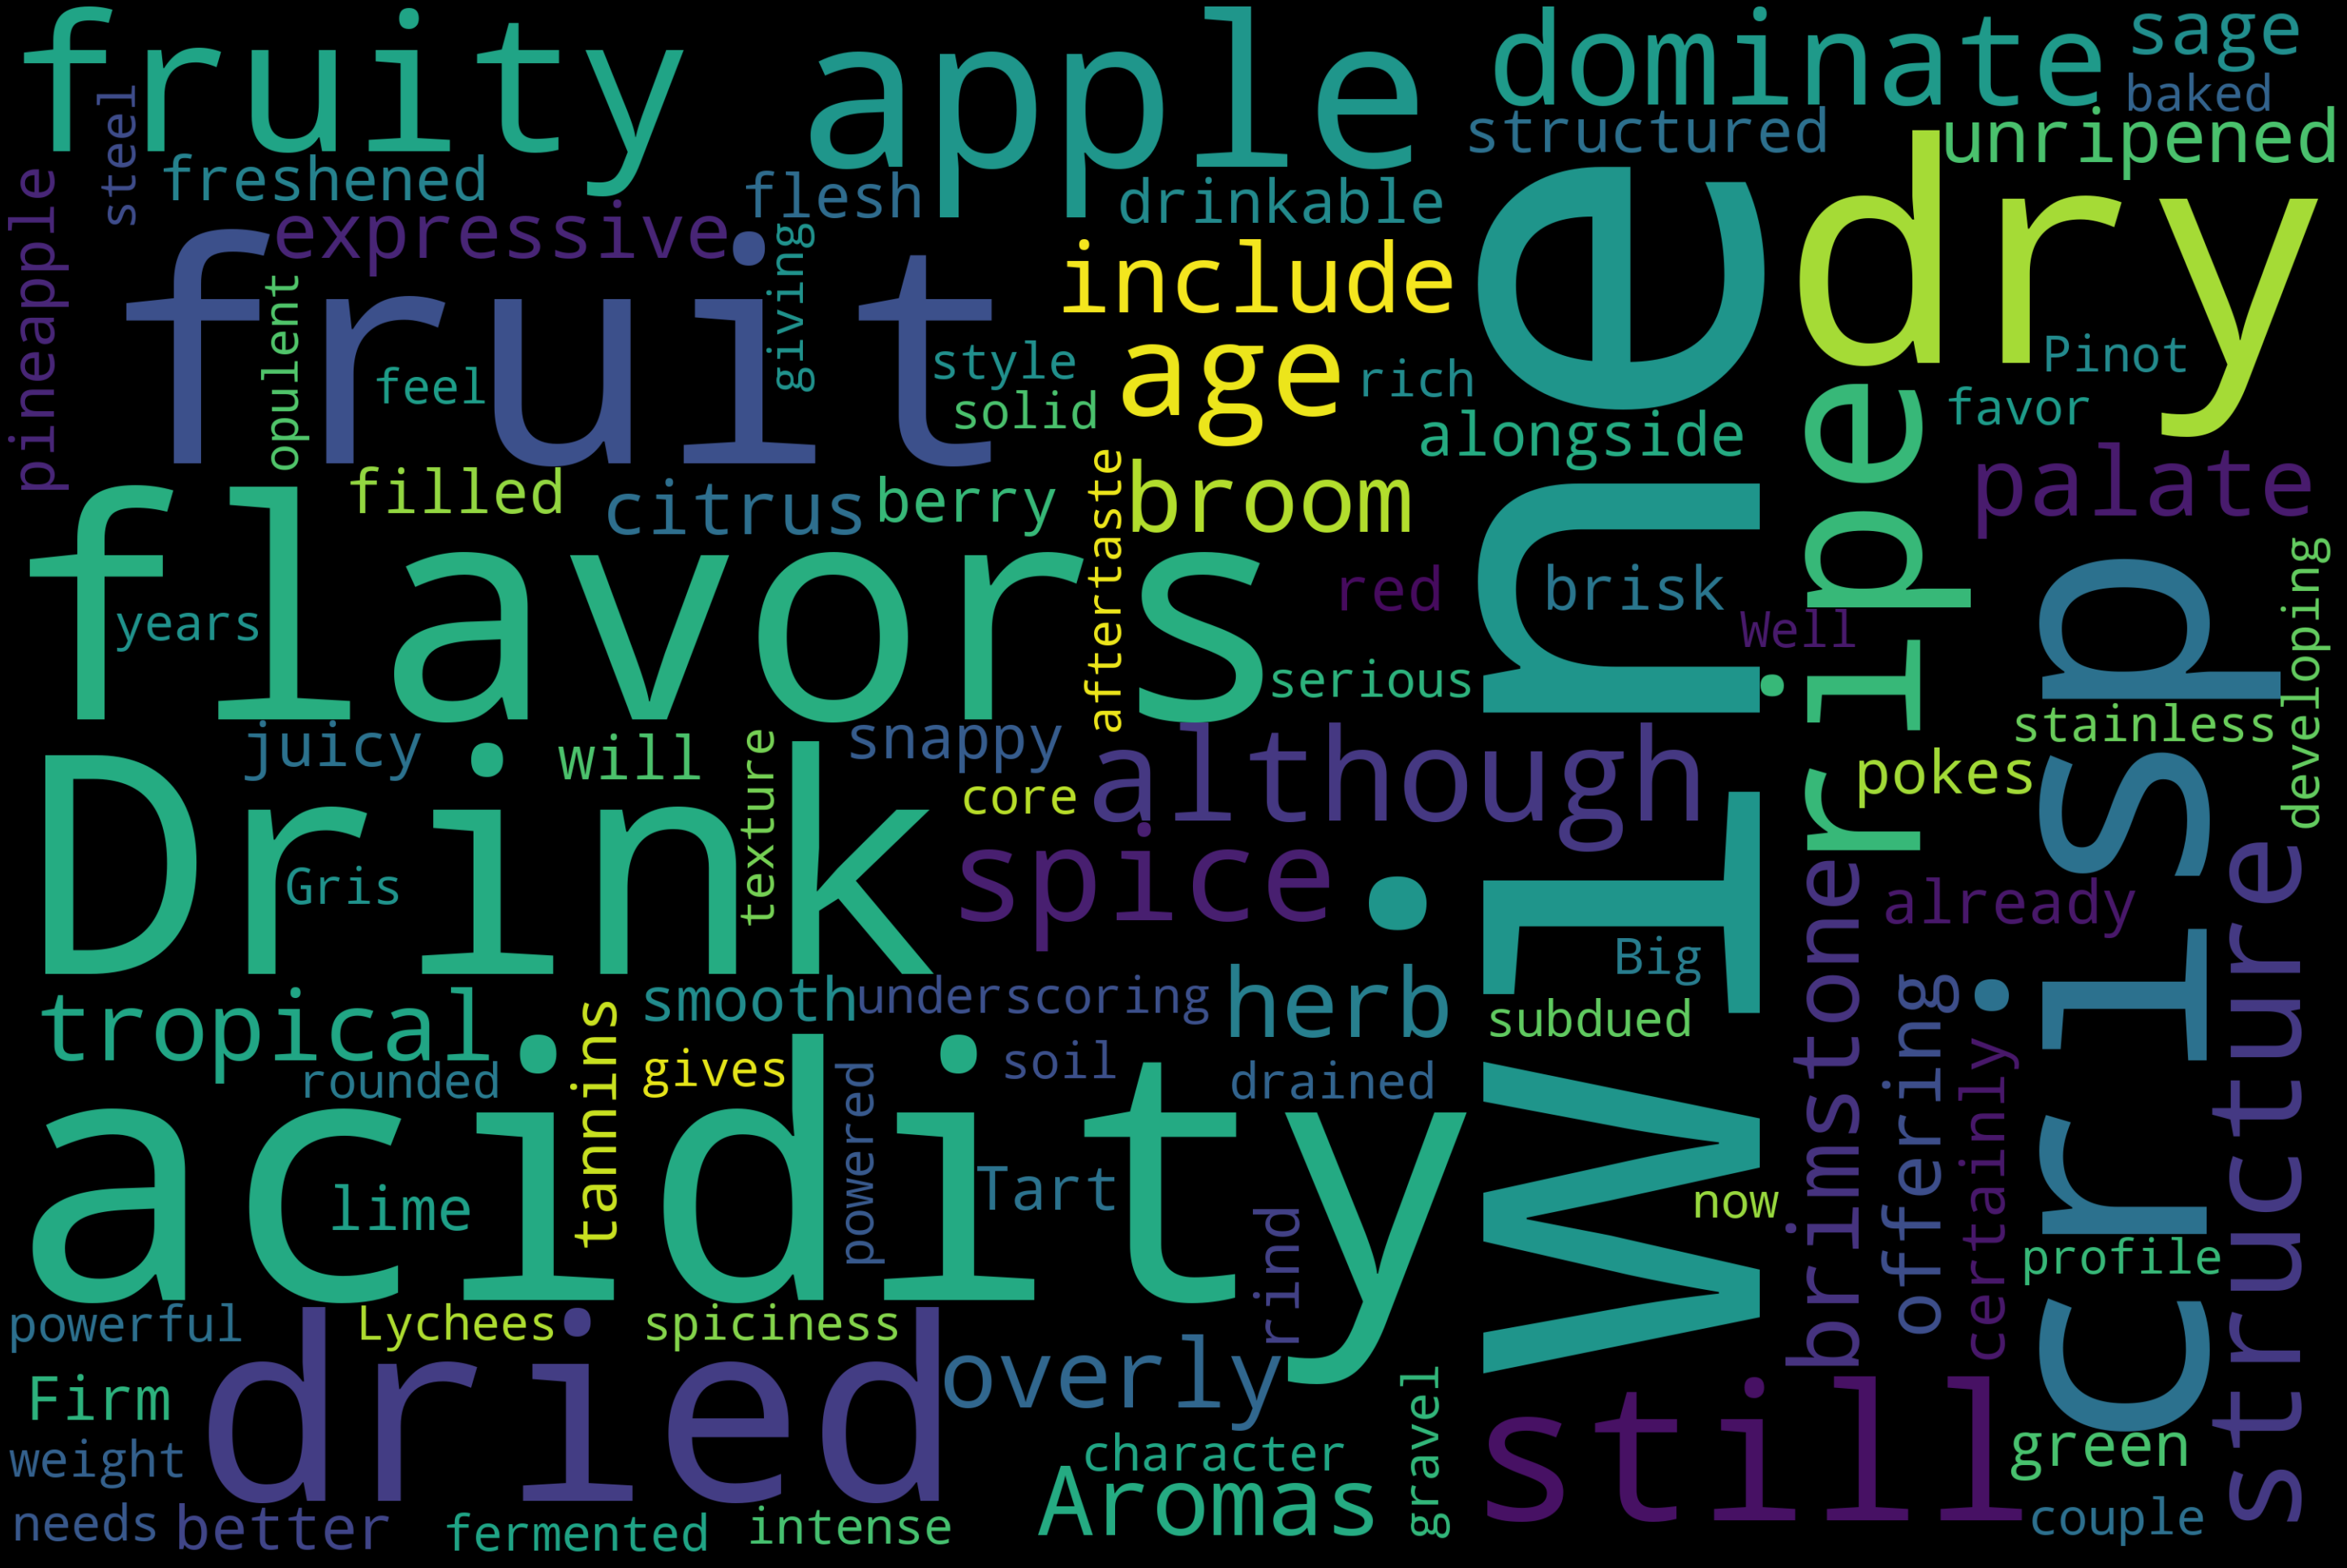

In [64]:
text = reviews.description.values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [65]:
description_old = reviews["description"]
values = ",".join(map(str, description_old))

filtered_words = [word for word in re.split("[\ \,\.]+", values) if word not in stop if word not in stop2]
counted_words = collections.Counter(filtered_words)

words = []
counts = []

for letter, count in counted_words.most_common(20):
    words.append(letter.lower())
    counts.append(count)

['flavors', 'fruit', 'palate', 'aromas', 'finish', 'acidity', 'tannins', 'cherry', 'ripe', 'black', 'drink', 'notes', 'spice', 'red', 'nose', 'oak', 'rich', 'fresh', 'berry', 'dry']


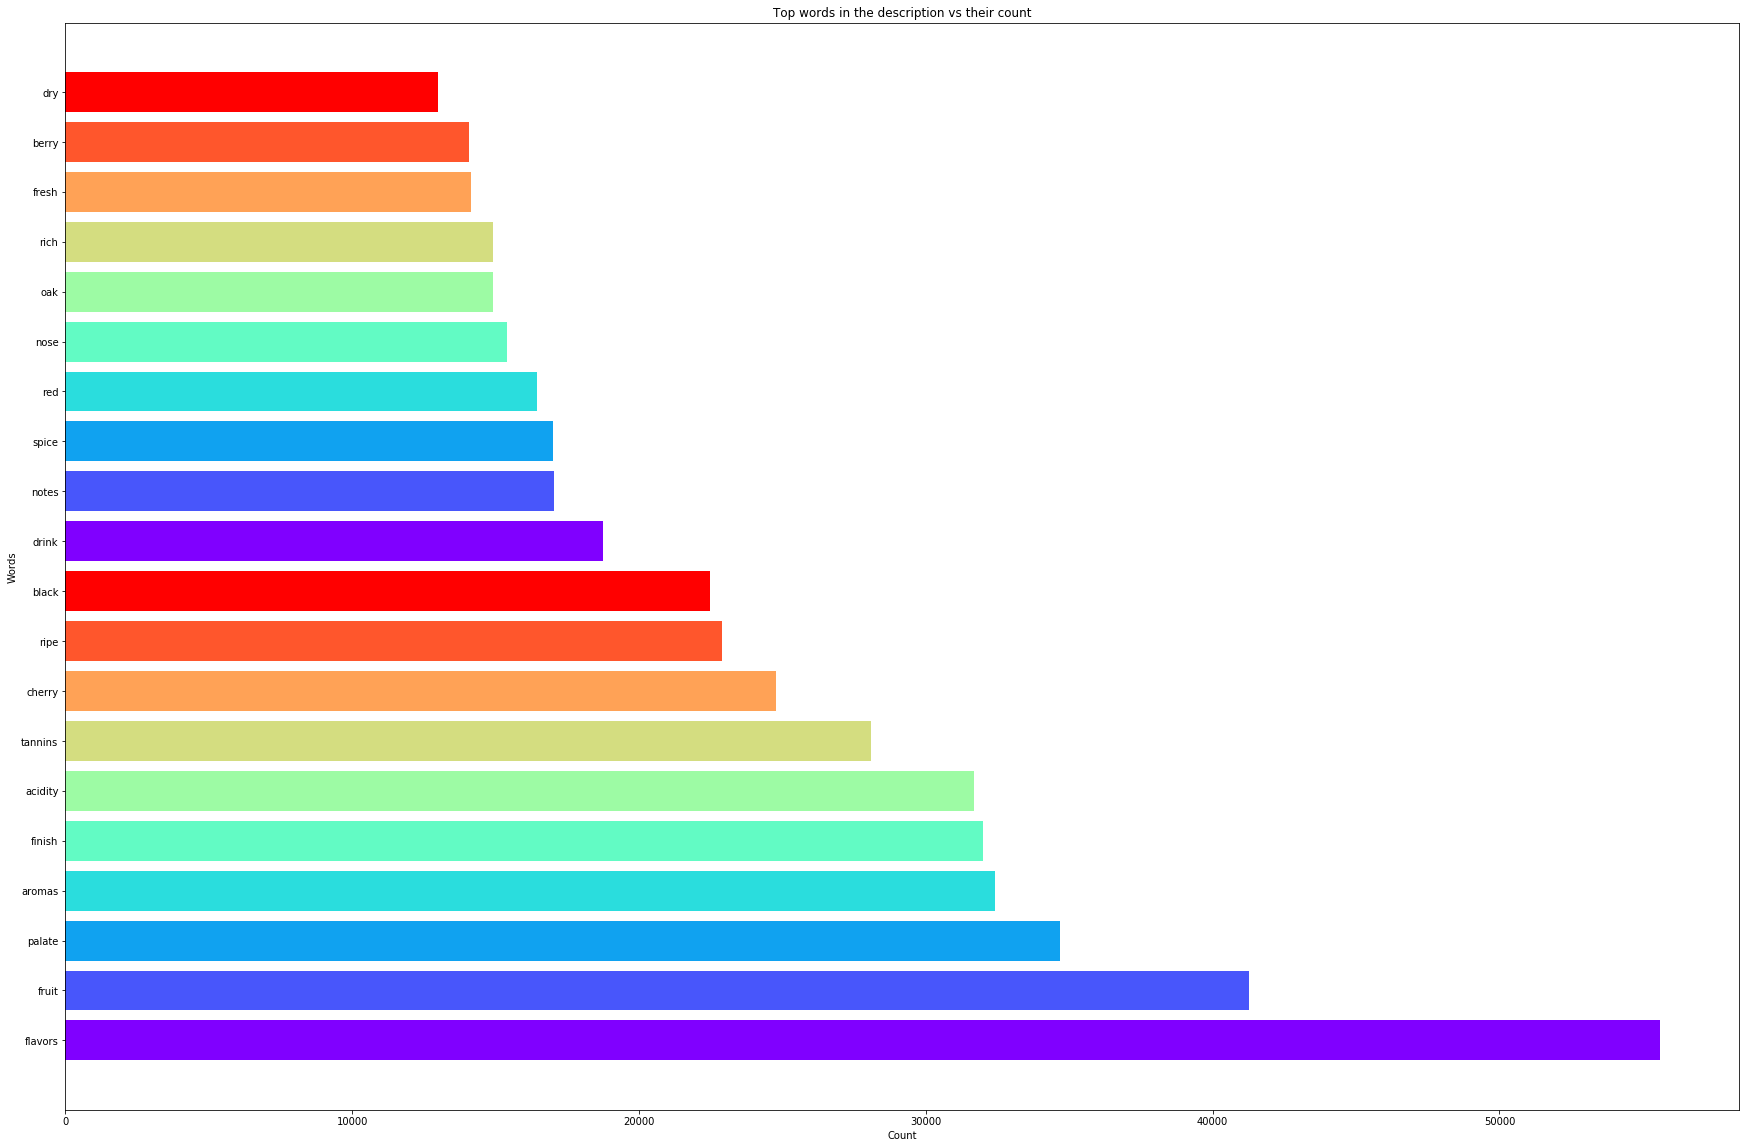

In [66]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 30, 20

plt.title('Top words in the description vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
print(words)

# Sudarome naujus stulpelius

Sukuriame 20 naujų stulpelių su top 20 populiariausių žodžių iš 'Description': 

In [67]:
# Žodyno matrica
all_hits_words = []
for description in reviews.description.values:
    hits_words = {}
    _description = re.split("[ \.\,]", description)

    for word in words:
        hit = 0
        if word in _description:
            hit = 1

        # kuriame stulpus kiekvienam 'review'
        hits_words[ word ] = hit

    # Eilutes su 1 ir 0 sujungiame į stulpą (kiekvienam top_20 žodžiui)
    all_hits_words.append(hits_words)

"Ištraukiame" metus iš 'title'

In [68]:
# 'Ištraukiame' metus iš 'title'
title_years = []
for title in reviews.title.values:
    year = 0

    m = re.search("(\d{4})", title)
    if m:
        # randame pirmą keturženklį atitikmenį ir konvertuojame jį į skaičių 
        year = int(m.group(1))

    review = {}
    review['year'] = year
    # kuriame stulpus
    title_years.append( review )

# Supdarome naują DataFrame

In [69]:
final_reviews = pd.DataFrame()

final_reviews["points"] = reviews["points"]
final_reviews["price"] = reviews["price"]
final_reviews["description_length"] = reviews["description"].apply(len)
final_reviews["description_length/price"] = reviews["description"].apply(len) / reviews["price"]

#final_reviews["country"] = reviews["country"]
#final_reviews["points"] = reviews["points"].apply(transform_points_simplified)
#final_reviews["province"] = reviews["province"]
#final_reviews["region"] = reviews["region_1"]
#final_reviews["variety"] = reviews["variety"]


# ištraukiame metus iš 'title_years' naudodami raktą "year".
final_reviews["year"] = [r["year"] for r in title_years]

for word in words:
    final_reviews[word] = [r[word] for r in all_hits_words]

#
# išvalome outliers ir netinkamus duomenis
#
from sklearn.preprocessing import minmax_scale
final_reviews["price"] = minmax_scale(reviews[["price"]])

# panaikimane outliers: year.
final_reviews = final_reviews[final_reviews.loc[:,'year'] <= 2019]
final_reviews = final_reviews[final_reviews.loc[:,'year'] >  1900]
# rescale year to 0.0-1.0
final_reviews["year"] = minmax_scale(final_reviews[["year"]])

# klaidingus duomenis.
final_reviews[final_reviews==np.inf]=np.nan
final_reviews.fillna(final_reviews.mean(), inplace=True)

final_reviews

,points,price,description_length,description_length/price,year,flavors,fruit,palate,aromas,finish,...,drink,notes,spice,red,nose,oak,rich,fresh,berry,dry
0,87,0.009641,172,10.095583,0.964602,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,0.003337,227,15.133333,0.946903,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,87,0.003034,186,13.285714,0.964602,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,0.002731,199,15.307692,0.964602,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,87,0.018507,249,3.830769,0.955752,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,90,0.007282,227,8.107143,0.964602,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
129967,90,0.021541,233,3.106667,0.884956,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129968,90,0.007888,225,7.500000,0.964602,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
129969,90,0.008495,216,6.750000,0.955752,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Dar kartą patikrinkime koreliaciją tarp kintamųjų ir 'points'

In [70]:
from scipy.stats import pearsonr

features = final_reviews.iloc[:,1:].columns.tolist()
target = final_reviews.iloc[:,0].name

correlations = {}
for f in features:
    data_temp = final_reviews[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
description_length vs points,0.562064
price vs points,0.401259
description_length/price vs points,-0.353571
rich vs points,0.169126
black vs points,0.164798
tannins vs points,0.128602
ripe vs points,0.116770
flavors vs points,-0.090792
spice vs points,0.090744
fruit vs points,0.058790


In [86]:
#final_reviews = final_reviews.drop(['flavors', 'fruit', 'palate', 'aromas', 'finish', 'acidity', 'cherry', 'drink', 'notes', 'spice', 'red', 'nose', 'oak', 'fresh', 'berry', 'dry'], axis=1)

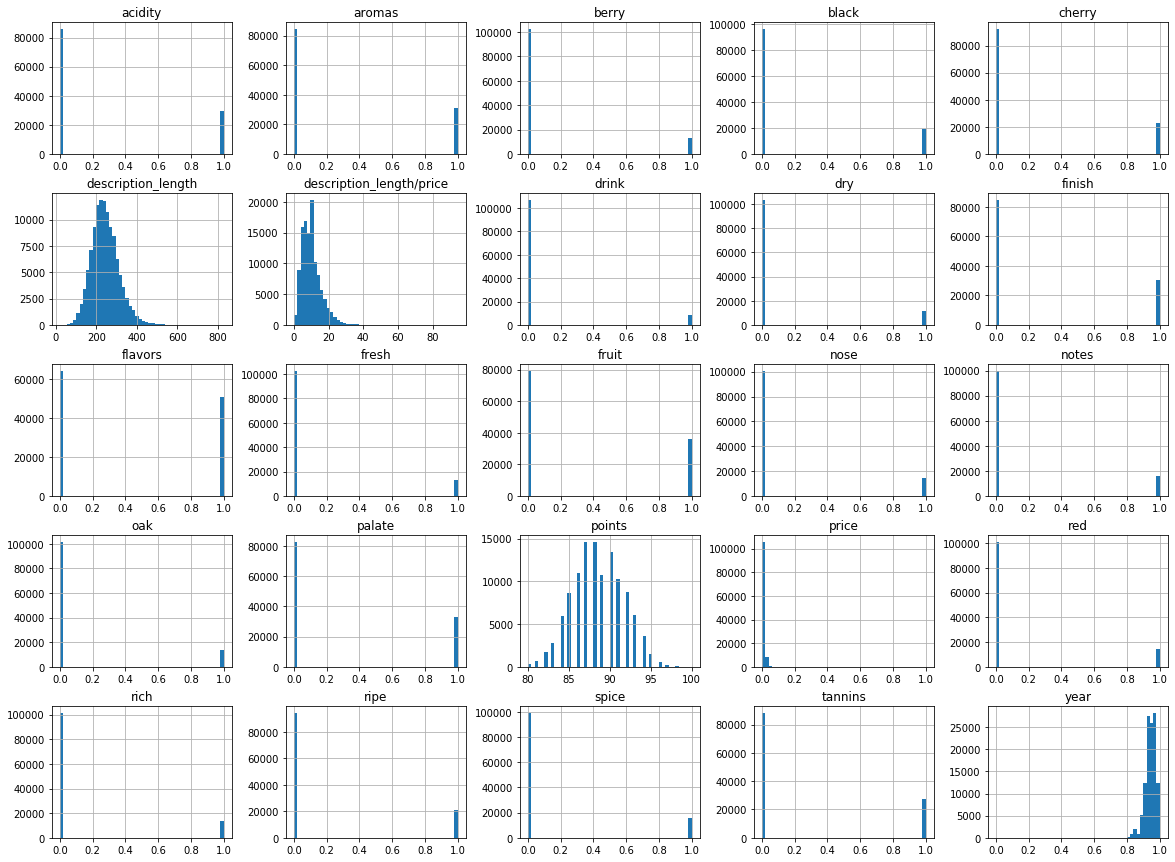

In [71]:
final_reviews.hist(bins=50, figsize=(20,15))
plt.show()

# Stulpų rinkimas ir algoritmų taikymas

In [36]:
from sklearn import metrics
from sklearn.preprocessing import minmax_scale

import warnings
warnings.filterwarnings("ignore")

#
# select_features(list_of_features)
#
def select_features(names):
    new_reviews = pd.DataFrame()
    #new_reviews.describe()
    # always include points.
    new_reviews["points"] = reviews["points"]

        
    if "description_length" in names:
        new_reviews["description_length"] = reviews["description"].apply(len)

    if "description_length/price" in names:
         new_reviews["description_length/price"] = reviews["description"].apply(len)/reviews["price"]
            
    if "price" in names:
        new_reviews["price"] = reviews["price"]
        new_reviews["price"] = minmax_scale(reviews[["price"]])
      
    if "words" in names:
        for word in words:
            new_reviews[word] = [r[word] for r in all_hits_words]
            
    
    
                                 
    if "year" in names:
        new_reviews["year"] = [r['year'] for r in title_years]
        
        # valome outliers: year.
        new_reviews = new_reviews[new_reviews.loc[:,'year'] <= 2019]
        new_reviews = new_reviews[new_reviews.loc[:,'year'] >  1900]
        # pakeičiame metų skalę į 0.0-1.0

        new_reviews["year"] = minmax_scale(new_reviews[["year"]])
        
    # klaidingus duomenis
    new_reviews[new_reviews==np.inf]=np.nan
    new_reviews.fillna(new_reviews.mean(), inplace=True)
       
    return new_reviews


def do_model(name,X_train,X_validation,Y_train,Y_validation):
    model = None

    if "LinR" == name:
        model = LinearRegression()
    if "LogR" == name:
        model = LogisticRegression()
        Y_train = Y_train.astype(int)
    if "SGD" == name:
        model = SGDClassifier()
        Y_train = Y_train.astype(int)
    if "SGDRegressor" == name:
        model = SGDRegressor()
        Y_train = Y_train.astype(int)
    if "rfr" == name:
        model = RandomForestRegressor()
    
    model.fit(X_train, Y_train)
    return model


def do_rmse(model,X_validation,Y_validation):
    predictions_model = model.predict(X_validation)
    return np.sqrt(metrics.mean_squared_error(Y_validation, predictions_model))

#
# iuteruojame pagal kintamuosius... tada modelius... tam kad gautume RMSE
#
model_results = {}
model_results['features'] = []

# 5 kintamiejie - 32 kombinacijos: 2 laipsnyje 5
for i in range(1, 32):
    features = []
    if (i & 1):
        features.append("description_length/price")
    if (i & 2):
        features.append("description_length")
    if (i & 4):
        features.append("year")
    if (i & 8):
        features.append("words")
    if (i & 16):
        features.append("price")

        
    model_results['features'].append( ",".join(features) )
    
    final_reviews = select_features(features)
    
    # išskiriame testavimo duomenis
    val = final_reviews.values
    X = val[:,1:]  # words ir kiti (price,year..) kintamieji.
    y = val[:,0]   # points
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=0)

    for model_name in ["LinR","LogR","SGD","rfr"]:
        model = do_model(model_name,X_train,X_validation,Y_train,Y_validation)
        rmse = do_rmse(model,X_validation,Y_validation)
        
        if model_name not in model_results:
            model_results[model_name] = []
        model_results[model_name].append( rmse )

        print("Features: %s  Model: %s  rmse: %.4f" % (",".join(features),model_name,rmse))
        
pd.DataFrame.from_dict(model_results)

Features: description_length/price  Model: LinR  rmse: 2.9047
Features: description_length/price  Model: LogR  rmse: 2.9587
Features: description_length/price  Model: SGD  rmse: 3.8849
Features: description_length/price  Model: rfr  rmse: 2.8545
Features: description_length  Model: LinR  rmse: 2.5629
Features: description_length  Model: LogR  rmse: 2.6735
Features: description_length  Model: SGD  rmse: 3.7331
Features: description_length  Model: rfr  rmse: 2.5561
Features: description_length/price,description_length  Model: LinR  rmse: 2.2563
Features: description_length/price,description_length  Model: LogR  rmse: 2.3331
Features: description_length/price,description_length  Model: SGD  rmse: 2.5149
Features: description_length/price,description_length  Model: rfr  rmse: 2.3371
Features: year  Model: LinR  rmse: 3.1019
Features: year  Model: LogR  rmse: 3.2450
Features: year  Model: SGD  rmse: 5.4838
Features: year  Model: rfr  rmse: 3.0858
Features: description_length/price,year  Mod

,features,LinR,LogR,SGD,rfr
0,description_length/price,2.904725,2.958712,3.884924,2.854511
1,description_length,2.562906,2.673514,3.733095,2.556101
2,"description_length/price,description_length",2.256330,2.333085,2.514853,2.337077
3,year,3.101863,3.244964,5.483833,3.085775
4,"description_length/price,year",2.901971,2.969399,4.573129,3.132951
5,"description_length,year",2.556553,2.662663,3.093441,2.616961
6,"description_length/price,description_length,year",2.243699,2.343672,2.956476,2.430046
7,words,2.959767,3.092296,4.740064,3.042773
8,"description_length/price,words",2.789460,2.903854,5.515897,2.988873
9,"description_length,words",2.457870,2.581709,3.128915,2.703744


Matome, kad labiausiai žadantys modeliai yra RandomForestRegressor() ir LinearRegression()

# Apžvelkime šiuos du modelius

In [158]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=0)

LinearRegression


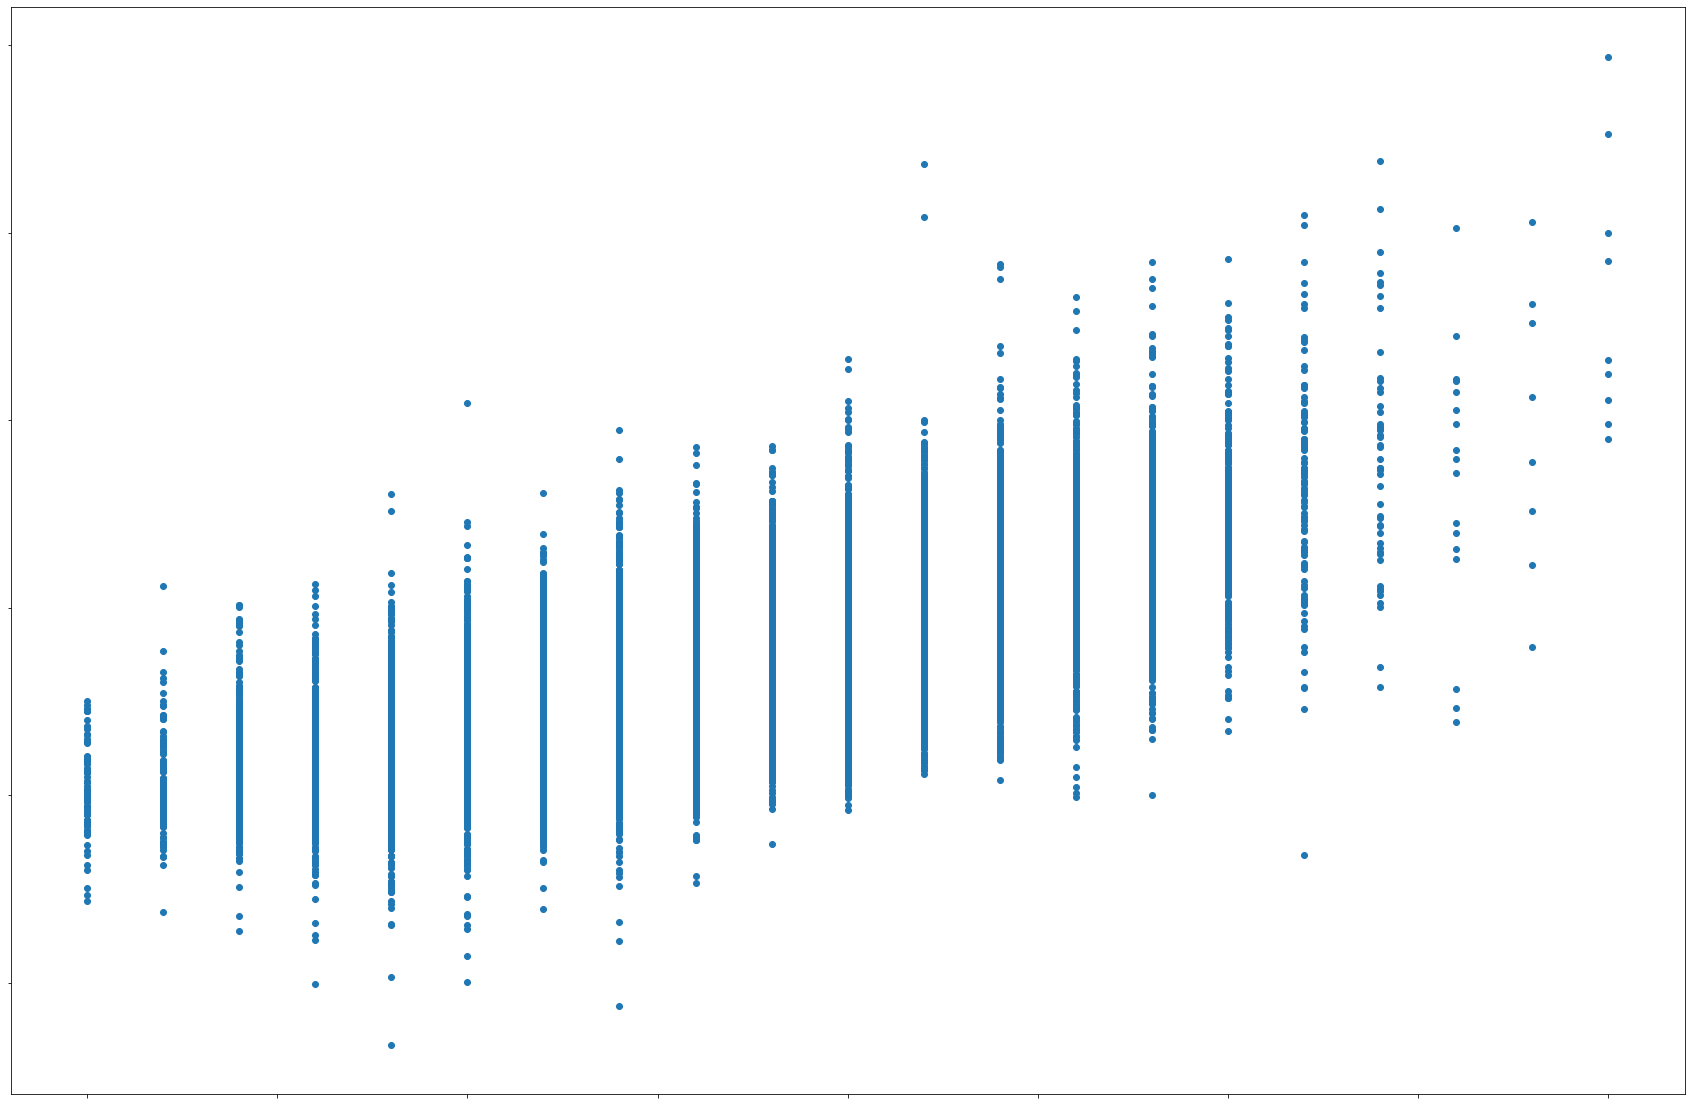

In [159]:
LinR.fit(X_train, Y_train)
pred = LinR.predict(X_validation)
print("LinearRegression")
predictions_clf = LinR.predict(X_validation)
predictions_clf.mean()
df_confusion = pd.crosstab(Y_validation, predictions_clf)
plt.scatter(Y_validation,predictions_clf)

RandomForestRegressor


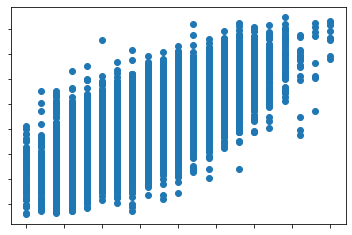

In [189]:
RFR.fit(X_train, Y_train)
pred = RFR.predict(X_validation)
print("RandomForestRegressor")
predictions_clf = RFR.predict(X_validation)
predictions_clf.mean()
df_confusion = pd.crosstab(Y_validation, predictions_clf)
plt.scatter(Y_validation,predictions_clf)

# Parinkime modelių hiperparametrus naudodami cross-validation

Linear Regression

In [79]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import math

In [145]:
LinR = LinearRegression()
RFR = RandomForestRegressor()

X = final_reviews.loc[:,"price":]
Y = final_reviews.loc[:,"points"]
kf = KFold(30, shuffle=False)
X = StandardScaler().fit_transform(X)

Linear Regression()

In [85]:
result = cross_val_score(LinR, X, Y, cv=kf, scoring='neg_mean_squared_error')
mse = -result
rmse = mse**(.5)
rmse = rmse.mean()
rmse

2.1417129860425197

RandomForestRegressor()

In [132]:
result = cross_val_score(RFR, X, Y, cv=kf, scoring='neg_mean_squared_error')
mse = -result
rmse = mse**(.5)
rmse = rmse.mean()
rmse

2.0791076190826563

In [133]:
RFR.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [149]:
params_rf = {'n_estimators': [50, 100, 200]}
gridforest = GridSearchCV(RFR, params_rf, cv = kf, n_jobs = 1, verbose = 1)
gridforest.fit(X, Y)
gridforest.best_params_

Fitting 30 folds for each of 3 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 78.4min finished


{'n_estimators': 200}

# Ensembling RandomForestRegressor() and LinearRegression()

In [151]:
RFR = RandomForestRegressor(n_estimators=200)
model1 = cross_val_score(RFR, X, Y, cv=kf, scoring='neg_mean_squared_error')
model2 = cross_val_score(LinR, X, Y, cv=kf, scoring='neg_mean_squared_error')


finalpred=(model1+model2)/2
mse = -finalpred
rmse = mse**(.5)
rmse = rmse.mean()
rmse


2.1124456756581886

Modelis pagerėjo nuo 2.19/2.15 iki 2.11

### WRONG DIRECTION

In [89]:
# extract data into binary representation.
test_reviews = final_reviews
test_reviews = test_reviews.drop(columns=['country','province','region','variety'])

#for name in ["region_1","province","variety","taster_twitter_handle","country"]:
for name in ['taster_twitter_handle', 'country']:
    hits = collections.Counter( reviews[name].values )
    for word, count in hits.most_common(5):
        print("top hits: %s: %s: %d" % (name,word,count))
        thedata = (word == reviews[name])
        if word != word:
            word = "NaN"
        test_reviews[name + "_" + word] = thedata

from sklearn.preprocessing import minmax_scale
test_reviews["price"] = minmax_scale(reviews[["price"]])

# clean outliers: year.
test_reviews = test_reviews[test_reviews.loc[:,'year'] <= 2019]
test_reviews = test_reviews[test_reviews.loc[:,'year'] >  1900]
test_reviews["year"] = minmax_scale(test_reviews[["year"]])

test_reviews[test_reviews==np.inf]=np.nan
test_reviews.fillna(test_reviews.mean(), inplace=True)

test_reviews

KeyError: "['country' 'province' 'region' 'variety'] not found in axis"

In [37]:
val = test_reviews.values
X = val[:,1:]  # words.
y = val[:,0]   # points.
y = y.astype(int)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

model = LinearRegression()
#model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X_train, Y_train)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 10
Selected Features: [ True False False  True False False  True False False False False False
  True  True False False  True False False False  True False False False
 False False  True False  True False False False  True False]
Feature Ranking: [ 1 22 18  1 15 23  1 17 13  7  4 21  1  1 19 24  1 14 16  9  1 12 11 20
 25  6  1  2  1  5 10  8  1  3]


In [38]:
from scipy.stats import pearsonr

features = test_reviews.iloc[:,1:].columns.tolist()
target = test_reviews.iloc[:,0].name

correlations = {}
for f in features:
    data_temp = test_reviews[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
description_length vs points,0.562064
price vs points,0.401259
description_length/price vs points,-0.353571
taster_twitter_handle_@wineschach vs points,-0.189041
rich vs points,0.169126
black vs points,0.164798
tannins vs points,0.128602
ripe vs points,0.116770
flavors vs points,-0.090792
spice vs points,0.090744


In [247]:
for i in range(0,len(fit.support_)):
    print("Selected feature: %d = %d = %s" % (fit.support_[i], fit.ranking_[i], test_reviews.columns[1+i]))
    
predictions_model = rfe.predict(X_validation)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, predictions_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_validation, predictions_model))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, predictions_model)))


Selected feature: 1 = 1 = year
Selected feature: 0 = 32 = flavors
Selected feature: 0 = 26 = fruit
Selected feature: 0 = 22 = palate
Selected feature: 0 = 30 = aromas
Selected feature: 0 = 16 = finish
Selected feature: 0 = 14 = acidity
Selected feature: 0 = 12 = tannins
Selected feature: 0 = 28 = cherry
Selected feature: 0 = 9 = ripe
Selected feature: 0 = 4 = black
Selected feature: 0 = 29 = drink
Selected feature: 0 = 18 = notes
Selected feature: 0 = 8 = spice
Selected feature: 0 = 21 = red
Selected feature: 0 = 17 = nose
Selected feature: 0 = 15 = oak
Selected feature: 1 = 1 = rich
Selected feature: 0 = 25 = fresh
Selected feature: 0 = 20 = berry
Selected feature: 0 = 19 = dry
Selected feature: 0 = 33 = taster_twitter_handle_NaN
Selected feature: 0 = 6 = taster_twitter_handle_@vossroger
Selected feature: 1 = 1 = taster_twitter_handle_@wineschach
Selected feature: 0 = 23 = taster_twitter_handle_@kerinokeefe
Selected feature: 1 = 1 = taster_twitter_handle_@vboone
Selected feature: 1 = 